In [37]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from plotnine import *
from sklearn.cluster import DBSCAN

### Import the data

In [2]:
data = 'titles.csv'
df = pd.read_csv(data)
df.shape

(9871, 15)

### Explore

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [4]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [5]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Problems 
1. Nulls
2. 'type' encoding
3. high variance data
4. PCA


In [6]:
#we will classify over geners

features = ['type','release_year','runtime' , 'imdb_score' , 'imdb_votes' , 'tmdb_popularity' , 'tmdb_score']
X = df[features]
X

,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,SHOW,1934,19,8.6,1092.0,15.424,7.6
1,MOVIE,1926,78,8.2,89766.0,8.647,8.0
2,MOVIE,1946,171,8.1,63026.0,8.435,7.8
3,MOVIE,1940,92,7.8,57835.0,11.270,7.4
4,MOVIE,1950,94,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...
9866,MOVIE,2021,93,5.3,20.0,1.406,NaN
9867,MOVIE,2021,55,NaN,NaN,0.600,NaN
9868,MOVIE,2021,116,NaN,NaN,1.960,NaN
9869,MOVIE,2021,72,8.4,49.0,0.645,NaN


### Processing

In [7]:
# type
# ordinal encode input variables

label_encoder = LabelEncoder()
X['type']  = label_encoder.fit_transform(X['type'] )
X.head()

C:\Users\Reem\AppData\Local\Temp\ipykernel_15388\867341539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1,1934,19,8.6,1092.0,15.424,7.6
1,0,1926,78,8.2,89766.0,8.647,8.0
2,0,1946,171,8.1,63026.0,8.435,7.8
3,0,1940,92,7.8,57835.0,11.270,7.4
4,0,1950,94,7.9,30924.0,8.273,7.6


### Feature transformation

In [8]:
#drop null 

scaler = StandardScaler()
X_nonull = X[features].dropna(axis='rows')
X_nonull.shape

(7317, 7)

In [9]:
#scaling 

X_clean = scaler.fit_transform(X_nonull)

In [13]:
print(X_clean)
print(X_clean.shape)

[[ 2.67529263 -2.48632446 -2.26508957 ... -0.18243508  0.22978226
   1.09388156]
 [-0.37379089 -2.78966254 -0.35324765 ...  1.58080293  0.01626341
   1.36314075]
 [-0.37379089 -2.03131733  2.66033368 ...  1.04909144  0.00958405
   1.22851116]
 ...
 [-0.37379089  0.81247719  0.06800565 ... -0.20359219 -0.21502506
   0.68999277]
 [-0.37379089  0.81247719  0.94291636 ... -0.19697065 -0.18714189
   0.68999277]
 [-0.37379089  0.81247719 -1.00132966 ... -0.20132536 -0.22611531
   0.35341879]]
(7317, 7)


In [15]:
# PCA
# change number of components from 7 to 2 
pca = PCA(n_components = 2)
X_clean = pca.fit_transform(X_clean)
X_clean

array([[ 3.48453369, -2.14644145],
       [ 1.3854324 ,  0.87562992],
       [ 0.21757168,  2.50548927],
       ...,
       [-1.03869704, -0.21069146],
       [ 0.16836674,  0.98998756],
       [-0.37895249, -0.72865087]])

In [17]:
# to df
X_df = pd.DataFrame(X_clean, columns = ['component1','component2'])
X_df

,component1,component2
0,3.484534,-2.146441
1,1.385432,0.875630
2,0.217572,2.505489
3,0.843903,0.788891
4,0.860587,0.635851
...,...,...
7312,-1.652838,0.187213
7313,0.153275,-0.268996
7314,-1.038697,-0.210691
7315,0.168367,0.989988


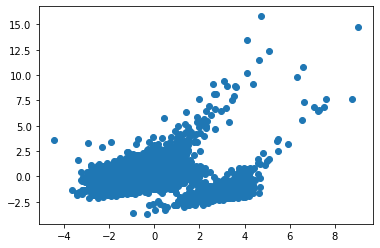

In [19]:
plt.scatter(X_df['component1'] , X_df['component2'])

### Clustering
1. Heirarchial
2. K-mens
3. DBCSCAN
4. Gaussian Mixture

##### Heirarchial

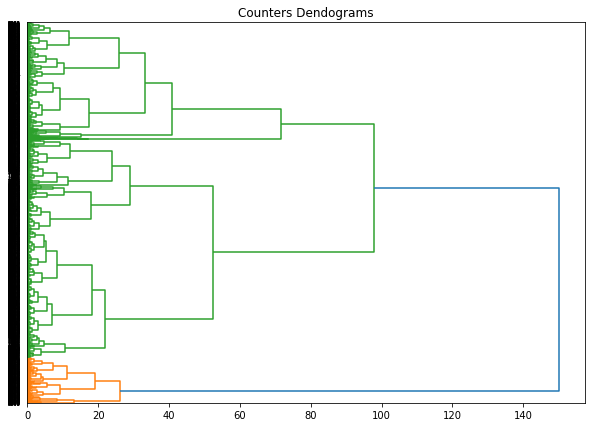

In [21]:
# Heirarchial

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(X_df ,method='ward', metric='euclidean'),orientation='right') 

In [52]:
# silhouette 
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_df)

silhouette_score(X_df,cluster.labels_)

0.6225775140302705

##### K-Means

Text(0.5, 1.0, 'Elbow curve')

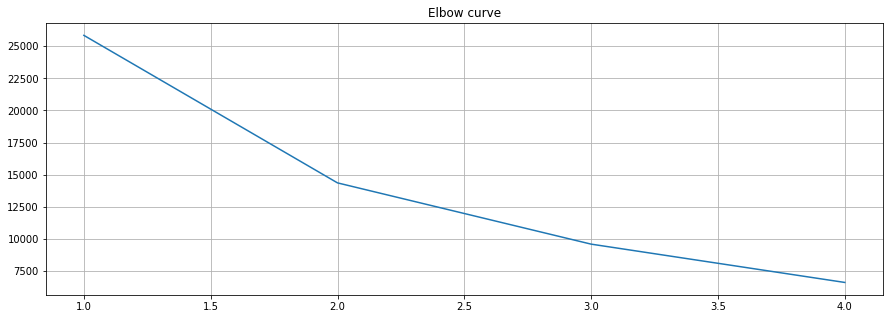

In [36]:
# K-means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_df)

distorsions = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_df)

    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 5), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [35]:
silhouette_score(X_df,kmeans.labels_)

0.6266289708818698

##### DBSCAN

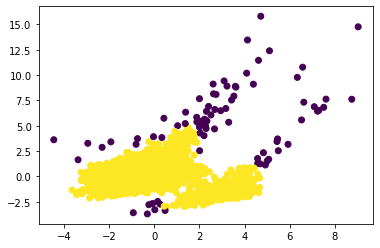

In [50]:
dbscan = DBSCAN(eps=0.5,min_samples=10)
db1l = dbscan.fit_predict(X_df)
plt.scatter(X_df.iloc[:,0],X_df.iloc[:,1],c=dbscan.labels_.astype(float))

In [51]:
print(silhouette_score(X_df,db1l))

0.7136962555630176


##### Gaussian Mixture

In [54]:
gm = GaussianMixture(2)
gm_fit = gm.fit_predict(X_df)
print(silhouette_score(X_df,gm_fit))

0.6306429604450025
